In [1]:
#Importing modules to use
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from google.colab import drive
from base64 import b64encode
from IPython.display import HTML
import os
import pandas

drive.mount('/content/drive')
path = '/content/drive/My Drive/fortran/' #Path where data file is stored and where the animation is saved
os.chdir(path);

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
plt.rcdefaults() #Restore the rc params to default

#Customize properties of the plots
plt.style.use('dark_background')
plt.rc('font', size = 14)
plt.rc('axes', titlesize = 10)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('legend', fontsize = 14)

plt.rcParams['lines.markersize'] = 12
plt.rcParams['legend.edgecolor'] = 'none'

plt.rcParams['axes3d.xaxis.panecolor'] = 'none'
plt.rcParams['axes3d.yaxis.panecolor'] = 'none'
plt.rcParams['axes3d.zaxis.panecolor'] = 'none'

plt.rcParams['axes.formatter.use_mathtext'] = True

In [3]:
# Reading data file
dataFile = 'output_angels.dat'  # Path to the data file
data = pandas.read_csv(dataFile, sep='\s+', header=0)  # Load the data, assuming space-separated values

num_columns = data.shape[1] # Name of the columns
num_bodies = (num_columns - 1) // 3 #Calculate the number of bodies knowing that each one has 3 coordinates (x, y, z)

columns = ["Time"] + [f"{axis}{i+1}" for i in range(num_bodies) for axis in ["x", "y", "z"]]
data.columns = columns

time = data["Time"] #Time

x_coords = [data[f"x{i+1}"].values for i in range(num_bodies)] # Get x coordinate for each body
y_coords = [data[f"y{i+1}"].values for i in range(num_bodies)] # Get y coordinate for each body
z_coords = [data[f"z{i+1}"].values for i in range(num_bodies)] # Get z coordinate for each body


In [4]:
n_bodies = len(x_coords)  # Number of bodies
n = len(data) # Number of data points per body

<ipython-input-5-db98d5c41d86>:82: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  star.set_data(x_coords[j][i], y_coords[j][i])
<ipython-input-5-db98d5c41d86>:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  star.set_data(x_coords[j][i], y_coords[j][i])
<ipython-input-5-db98d5c41d86>:93: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  star.set_data(y_coords[j][i], z_coords[j][i])


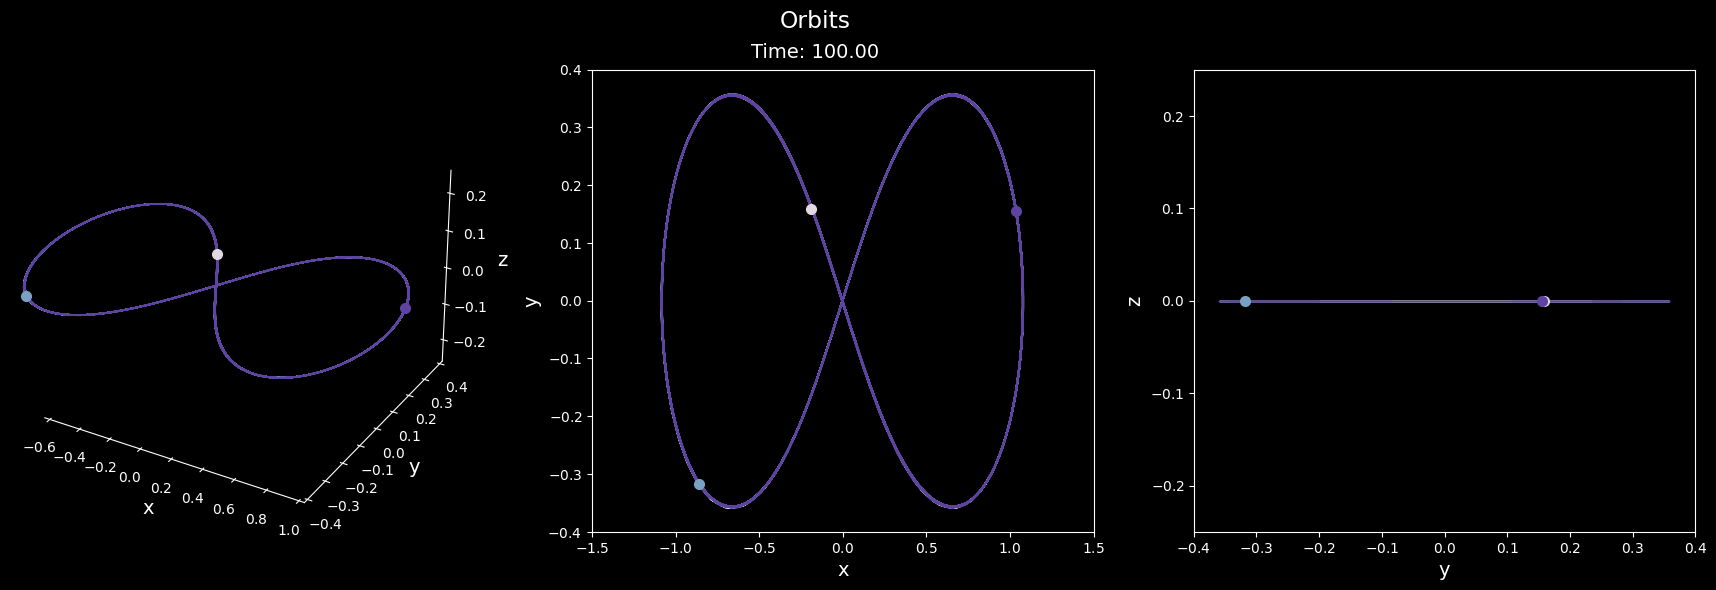

In [5]:
# Set up the figure and subplots
fig = plt.figure(figsize=(22, 6))
fig.suptitle('Orbits')

# Normalization and color mapping for the orbits based on distance
norm = Normalize(vmin=0, vmax=n_bodies + 3)  # Normalize distances for color mapping
scalar_map = ScalarMappable(norm=norm, cmap='twilight')  # Color map for the orbits

# Generate colors for each body
orbit_colors = [scalar_map.to_rgba(i) for i in range(n_bodies)]

# 3D subplot
ax_3d = fig.add_subplot(131, projection='3d')
orbit_lines1 = [ax_3d.plot([], [], [], ls='-', linewidth=1)[0] for _ in range(n_bodies)]  # Lines for orbits
stars1 = [ax_3d.plot([], [], [], 'o', markersize=7)[0] for _ in range(n_bodies)]  # Markers for bodies
ax_3d.set_xlim(-0.6, 1)
ax_3d.set_ylim(-0.4, 0.4)
ax_3d.set_zlim(-0.25, 0.25)
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')
ax_3d.grid(False)

# 2D subplot: x-y plane
ax_2d_1 = fig.add_subplot(132)
orbit_lines2 = [ax_2d_1.plot([], [], ls='-', linewidth=1)[0] for _ in range(n_bodies)]  # Lines for 2D orbits
stars2 = [ax_2d_1.plot([], [], 'o', markersize=7)[0] for _ in range(n_bodies)]  # Markers for bodies
ax_2d_1.set_xlim(-1.5, 1.5)
ax_2d_1.set_ylim(-0.4, 0.4)
ax_2d_1.set_xlabel('x')
ax_2d_1.set_ylabel('y')

# 2D subplot: y-z plane
ax_2d_2 = fig.add_subplot(133)
orbit_lines3 = [ax_2d_2.plot([], [], ls='-', linewidth=1)[0] for _ in range(n_bodies)]  # Lines for 2D orbits
stars3 = [ax_2d_2.plot([], [], 'o', markersize=7)[0] for _ in range(n_bodies)]  # Markers for bodies
ax_2d_2.set_xlim(-0.4, 0.4)
ax_2d_2.set_ylim(-0.25, 0.25)
ax_2d_2.set_xlabel('y')
ax_2d_2.set_ylabel('z')

# Text for showing the time
time_text = fig.text(0.5, 0.9, '', ha = 'center')

# Initialization function
def init():
    # Initialize the 3D plot
    for line, star, color in zip(orbit_lines1, stars1, orbit_colors):
        line.set_data([], [])
        line.set_3d_properties([])
        line.set_color(color)
        star.set_data([], [])
        star.set_3d_properties([])
        star.set_color(color)

    # Initialize the first 2D plot (x-y plane)
    for line, star, color in zip(orbit_lines2, stars2, orbit_colors):
        line.set_data([], [])
        line.set_color(color)
        star.set_data([], [])
        star.set_color(color)

    # Initialize the second 2D plot (y-z plane)
    for line, star, color in zip(orbit_lines3, stars3, orbit_colors):
        line.set_data([], [])
        line.set_color(color)
        star.set_data([], [])
        star.set_color(color)

    # Initialize the time text
    time_text.set_text('Time: 0.0')

    # Return all the animated objects
    return orbit_lines1 + stars1 + orbit_lines2 + stars2 + orbit_lines3 + stars3

# Animation function
def animate(i):
    # Update 3D plot (x, y, z coordinates over time)
    for j, (line, star) in enumerate(zip(orbit_lines1, stars1)):
        line.set_data(x_coords[j][:i], y_coords[j][:i])
        line.set_3d_properties(z_coords[j][:i])
        star.set_data(x_coords[j][i], y_coords[j][i])
        star.set_3d_properties(z_coords[j][i])

    # Update the 2D x-y plot
    for j, (line, star) in enumerate(zip(orbit_lines2, stars2)):
        line.set_data(x_coords[j][:i], y_coords[j][:i])
        star.set_data(x_coords[j][i], y_coords[j][i])

    # Update the 2D y-z plot
    for j, (line, star) in enumerate(zip(orbit_lines3, stars3)):
        line.set_data(y_coords[j][:i], z_coords[j][:i])
        star.set_data(y_coords[j][i], z_coords[j][i])

    current_time = time[i]  # Obtain current time to show in the animation
    time_text.set_text(f'Time: {current_time:.2f}') # Upadete the time text

    # Return all the updated animated objects
    return orbit_lines1 + stars1 + orbit_lines2 + stars2 + orbit_lines3 + stars3

# Create the animation object with FuncAnimation
ani = FuncAnimation(fig, animate, frames=n, init_func=init, interval=30, blit=True, repeat=True)

# Save the animation to a video file
ani.save('orbit_animation_angels.mp4', writer='ffmpeg', fps=30)

In [6]:
# Play the animation
mp4 = open('orbit_animation_angels.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)